In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.stats import wasserstein_distance  # Import Wasserstein distance

# Function to create the GAN
def build_gan(latent_dim):
    generator = models.Sequential([
        layers.Dense(128, input_shape=(latent_dim,), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(X_train.shape[1], activation='sigmoid')  # Output layer
    ])

    discriminator = models.Sequential([
        layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  # Output layer
    ])

    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)

    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return generator, discriminator, gan

# dataset loading
#df = pd.read_csv('/Users/farhatlamiabarsha/Downloads/archive/Fraud_Data.csv')
df = pd.read_csv('/Users/farhatlamiabarsha/Downloads/creditcard.csv')

# Preprocess data 
columns_to_drop = ['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28', ]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Split the dataset into dependent and independent variables
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Build and train the GAN
latent_dim = 100
generator, discriminator, gan = build_gan(latent_dim)

# Training the GAN
epochs = 10000
batch_size = 64

min_loss = float('inf')

# Lists to store generator and discriminator losses
generator_losses = []
discriminator_losses = []

for epoch in range(epochs):
    noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
    generated_data = generator.predict(noise)
    
    idx_real = np.random.randint(0, X_train.shape[0], size=batch_size)
    real_data = X_train.iloc[idx_real]
    
    X_discriminator = np.concatenate([real_data, generated_data])
    y_discriminator = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    
    d_loss = discriminator.train_on_batch(X_discriminator, y_discriminator)
    
    noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
    y_generator = np.ones((batch_size, 1))
    
    g_loss = gan.train_on_batch(noise, y_generator)
    
    # Append losses to the lists
    generator_losses.append(g_loss[0])
    discriminator_losses.append(d_loss[0])
    
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss[0]}")
    
    if epoch > 10 and epoch % 10 == 0:
        current_loss = g_loss[0]  # You may adjust this based on your preference
        if current_loss > min_loss:
            print(f"Early stopping at epoch {epoch} due to lack of improvement.")
            break
        else:
            min_loss = current_loss 

# After GAN training
latent_dim = 100
generator, _, _ = build_gan(latent_dim)

# Generate synthetic data using the trained generator
num_samples = X_test.shape[0]
noise1 = np.random.normal(0, 1, size=[num_samples, latent_dim])
noise2 = np.random.normal(0, 1, size=[num_samples, latent_dim])

synthetic_data1 = generator.predict(noise1)
synthetic_data2 = generator.predict(noise2)

# Continue with the rest of your code...
# ...
# Generate synthetic data using the trained generator
num_samples = X_test.shape[0]
synthetic_data = generator.predict(np.random.normal(0, 1, size=[num_samples, latent_dim]))

# Combine real and synthetic data
X_combined = pd.concat([X_train, pd.DataFrame(synthetic_data, columns=X_train.columns)], ignore_index=True)
y_combined = pd.concat([y_train, pd.Series(np.zeros(num_samples), name='class')], ignore_index=True)

# Train model
fraud_detection_model = LogisticRegression()
fraud_detection_model.fit(X_combined, y_combined)

# Evaluate the model on the test set
y_pred = fraud_detection_model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


2024-05-14 12:14:45.337799: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-14 12:14:45.407805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:45.562717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]


Epoch 0, Discriminator Loss: 392.17755126953125, Generator Loss: 0.6399774551391602
2/2 [==============================] - 0s 967us/step


2024-05-14 12:14:45.936281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:45.939480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:45.966440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 931us/step
Epoch 10, Discriminator Loss: 315.2260437011719, Generator Loss: 0.6259476542472839
2/2 [==============================] - 0s 865us/step


2024-05-14 12:14:46.145090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:46.147997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:46.177880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 955us/step
Epoch 20, Discriminator Loss: 441.5179748535156, Generator Loss: 0.6183969378471375
2/2 [==============================] - 0s 879us/step


2024-05-14 12:14:46.358887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:46.361757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:46.388695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 845us/step


2024-05-14 12:14:46.567057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:46.569935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:46.596286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

2/2 [==============================] - 0s 927us/step
Epoch 30, Discriminator Loss: 764.88330078125, Generator Loss: 0.6202313899993896
Early stopping at epoch 30 due to lack of improvement.


2024-05-14 12:14:46.772744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:46.775628: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [64,1]
	 [[{{node Placeholder/_1}}]]
2024-05-14 12:14:46.802062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [128,1]

1781/1781 [==============================] - 1s 318us/step


/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

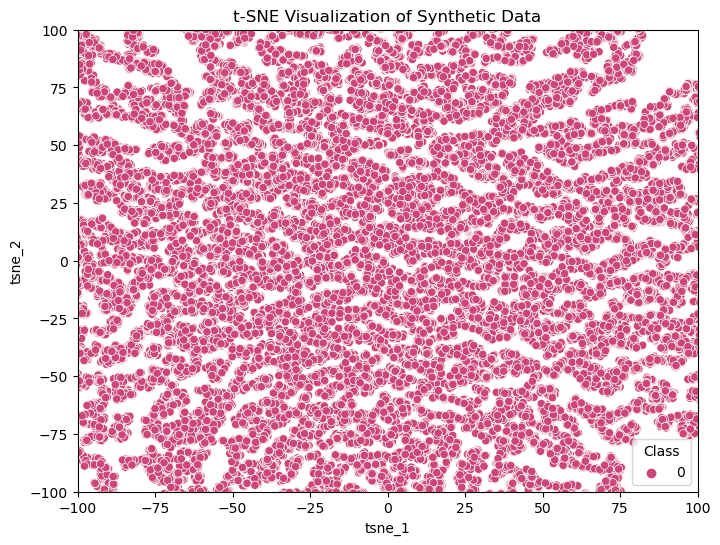

In [2]:
from sklearn.manifold import TSNE

# Apply t-SNE to the synthetic data
tsne = TSNE(n_components=2, random_state=42)
synthetic_data_tsne = tsne.fit_transform(synthetic_data)

# Create a DataFrame for t-SNE results
df_tsne = pd.DataFrame(data=synthetic_data_tsne, columns=['tsne_1', 'tsne_2'])
df_tsne['Class'] = 0  

# Visualize t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Class', data=df_tsne, palette='plasma')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.title('t-SNE Visualization of Synthetic Data')
plt.show()

/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_cat

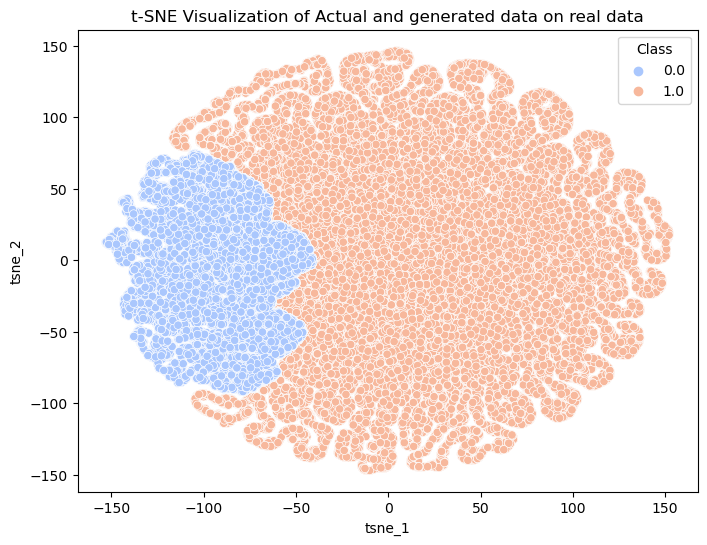

In [5]:
real_and_synthetic_data = pd.concat([X_train, pd.DataFrame(synthetic_data, columns=X_train.columns)], ignore_index=True)

# Apply t-SNE to the combined data
tsne = TSNE(n_components=2, random_state=42)
real_and_synthetic_data_tsne = tsne.fit_transform(real_and_synthetic_data)

# Create a DataFrame for t-SNE results
df_tsne = pd.DataFrame(data=real_and_synthetic_data_tsne, columns=['tsne_1', 'tsne_2'])
df_tsne['Class'] = np.concatenate([np.ones(X_train.shape[0]), np.zeros(synthetic_data.shape[0])])  # 1 for real, 0 for synthetic

# Visualize t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Class', data=df_tsne, palette='coolwarm')
plt.title('t-SNE Visualization of Actual and generated data on real data')
plt.show()

/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/farhatlamiabarsha/anaconda3/envs/gan/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

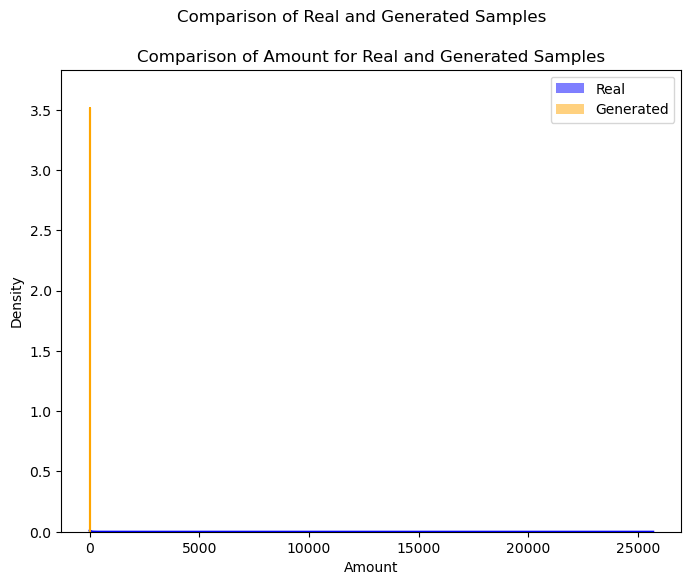

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize samples
def visualize_samples(real_samples, generated_samples, feature_to_compare='Amount'):
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.suptitle('Comparison of Real and Generated Samples')

    # Plot histogram for real samples
    sns.histplot(real_samples[feature_to_compare], kde=True, color='blue', label='Real', stat='density', ax=ax)

    # Plot histogram for generated samples
    sns.histplot(generated_samples[feature_to_compare], kde=True, color='orange', label='Generated', stat='density', ax=ax)

    ax.set_title(f'Comparison of {feature_to_compare} for Real and Generated Samples')
    ax.legend()
    plt.show()

# Assuming X_train and generated_data_df are DataFrames with credit card fraud data
# You can customize feature_to_compare based on the feature in your dataset
generated_data_df = pd.DataFrame(synthetic_data1, columns=X_train.columns)
# Visualize samples for the specified feature
visualize_samples(X_train, generated_data_df, feature_to_compare='Amount')

In [7]:
# Function to calculate Wasserstein distance
def calculate_wasserstein_distance_between_synthetic(synthetic_data1, synthetic_data2):
    # Compute the Wasserstein distance
    distance = wasserstein_distance(synthetic_data1.flatten(), synthetic_data2.flatten())
    return distance

# Calculate Wasserstein distance between synthetic_data1 and synthetic_data2
wasserstein_distance_value_synthetic = calculate_wasserstein_distance_between_synthetic(synthetic_data1, synthetic_data2)
print(f"Wasserstein Distance between Synthetic Data 1 and Synthetic Data 2: {wasserstein_distance_value_synthetic}")


Wasserstein Distance between Synthetic Data 1 and Synthetic Data 2: 0.0006426266052156118
